In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  移除低方差特征

VarianceThreshold 是特征选择的一个简单基本方法，它会移除所有那些方差不满足一些阈值的特征。默认情况下，它将会移除所有的零方差特征，即那些在所有的样本上的取值均不变的特征。

例如，假设我们有一个特征是布尔值的数据集，我们想要移除那些在整个数据集中特征值为0或者为1的比例超过80%的特征。布尔特征是伯努利（ Bernoulli ）随机变量，变量的方差为

$\mathrm{Var}[X] = p(1 - p)$

因此，我们可以使用阈值 [](#id3).8 * (1 - .8)进行选择:

In [4]:
from sklearn.feature_selection import VarianceThreshold


# 创建特征矩阵：
# 特征 0：5/6 的类 0
X = [[0, 0, 1],
     [0, 1, 0],
     [1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 0], 
     [0, 1, 1]]
sel = VarianceThreshold(threshold=0.8*(1-0.8))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [5]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
# 加载鸢尾花数据
iris = datasets.load_iris()

# 创建特征和目标
X = iris.data
y = iris.target

# 使用方差阈值 0.5 创建 VarianceThreshold 对象
thresholder = VarianceThreshold(threshold=.5)

# 应用方差阈值
X_high_variance = thresholder.fit_transform(X)

# 查看方差大于阈值的前五行
X_high_variance[0:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

# 用于特征选择的卡方

主要是比较两个及两个以上样本率( 构成比）以及两个`分类变量`的关联性分析。其根本思想就是在于比较理论频数和实际频数的吻合程度或拟合优度问题。

$$\chi^2 = \Sigma \frac {(O-E)^2}{E}$$

O为观察频数, E代表期望频数

$\chi^2$数值越小, 说明观察频数和期望频数之间的差别不大

我们需要查询卡纸分布的临界值，将计算的值与临界值比较

查询临界值就需要知道自由度

自由度V=（行数-1）*（列数-1）；


如果$\chi^2 <临界值$ 则假设成立。。

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKBest?

Init signature: SelectKBest(score_func=<function f_classif at 0x7f5f1c051e60>, *, k=10)
Docstring:     
Select features according to the k highest scores.

Read more in the :ref:`User Guide <univariate_feature_selection>`.

Parameters
----------
score_func : callable
    Function taking two arrays X and y, and returning a pair of arrays
    (scores, pvalues) or a single array with scores.
    Default is f_classif (see below "See also"). The default function only
    works with classification tasks.

    .. versionadded:: 0.18

k : int or "all", optional, default=10
    Number of top features to select.
    The "all" option bypasses selection, for use in a parameter search.

Attributes
----------
scores_ : array-like of shape (n_features,)
    Scores of features.

pvalues_ : array-like of shape (n_features,)
    p-values of feature scores, None if `score_func` returned only scores.

Examples
--------
>>> from sklearn.datasets import load_digits
>>> from sklearn.feature_selection import 

In [7]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 加载鸢尾花数据
iris = load_iris()

# 创建特征和目标
X = iris.data
y = iris.target

# 通过将数据转换为整数，转换为类别数据
X = X.astype(int)
# 选择两个卡方统计量最高的特征
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
# 展示结果
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [8]:
chi2_selector.scores_

array([ 10.28712871,   5.02267003, 133.06854839,  74.27906977])


pvalue就是用于检验特征与变量之间相关性的，假设你给出α值（常常取0.05，0.01），如果你的pvalue小于α，那就有把握认为，这个特征和预测变量y之间，具有相关性。比方说你取α=0.05，这就意味着你有95%（也就是1-α）的把握认为，这个特征和预测变量y之间存在相关性

In [11]:
chi2_selector.pvalues_

array([5.83684799e-03, 8.11598175e-02, 1.27213107e-29, 7.42172639e-17])

In [10]:
chi2_selector.get_support()

array([False, False,  True,  True])

# 用于特征选取的 ANOVA F 值

如果特征是类别的，计算每个特征与目标向量之间的卡方($\chi^2$)统计量。

 但是，如果特征是定量的，则计算每个特征与目标向量之间的 ANOVA F 值。

F 值得分检查当我们按照目标向量对数字特征进行分组时，每个组的均值是否显着不同。

https://blog.csdn.net/jetFlow/article/details/78884619

In [13]:
# 加载库
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# 加载鸢尾花数据
iris = load_iris()

# 创建特征和标签
X = iris.data
y = iris.target

fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest = fvalue_selector.fit_transform(X, y)

# 展示结果
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [15]:
fvalue_selector.get_support()

array([False, False,  True,  True])

In [16]:
fvalue_selector.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [17]:
fvalue_selector.pvalues_

array([1.66966919e-31, 4.49201713e-17, 2.85677661e-91, 4.16944584e-85])

# 丢弃高度相关的特征

In [18]:
# 创建特征矩阵，具有两个高度相关特征
X = np.array([[1, 1, 1],
              [2, 2, 0],
              [3, 3, 1],
              [4, 4, 0],
              [5, 5, 1],
              [6, 6, 0],
              [7, 7, 1],
              [8, 7, 0],
              [9, 7, 1]])
df = pd.DataFrame(X)
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [19]:
# 创建相关度矩阵
corr_matrix = df.corr().abs()
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


In [20]:
# 选择相关度矩阵的上三角
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
)
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [22]:
# 寻找相关度大于 0.95 的特征列的索引
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[1]

In [23]:
# 丢弃特征
df.drop(df.columns[to_drop], axis=1)

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,1


# 递归特征消除Recursive feature elimination （RFE）

递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型）然后选出最好的（或者最差的）的特征（可以根据系数来选），把选出来的特征选择出来，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。 

RFE的稳定性很大程度上取决于在迭代的时候底层用哪种模型。例如，假如RFE采用的普通的回归，没有经过正则化的回归是不稳定的，那么RFE就是不稳定的；假如采用的是Ridge，而用Ridge正则化的回归是稳定的，那么RFE就是稳定的

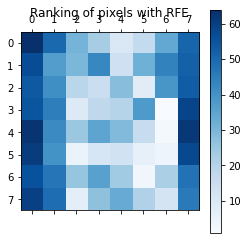

In [24]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)  # 每次迭代要移除的特征数1
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, n_features=100, n_informative=2, random_state=1)
ols = LinearRegression()

# 创建递归特征消除器，按照 MSE 对特征评分
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X, y)

RFECV(estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [31]:
rfecv.transform(X)

array([[ 0.00850799,  1.13220029,  0.72766053,  0.7031277 ],
       [-1.07500204,  1.02994989,  0.37773681,  2.56148527],
       [ 1.37940721, -1.58203529,  0.23939251, -1.77039484],
       ...,
       [-0.80331656, -0.3140609 ,  0.49406726, -1.60648007],
       [ 0.39508844, -0.6374364 , -0.75729509, -1.34564911],
       [-0.55383035, -2.20671933, -0.0521681 ,  0.82880112]])

In [30]:
# 最佳特征数量
rfecv.n_features_

4

# 使用 SelectFromModel 选取特征

## 基于L1的特征提取

Linear models 使用 L1 正则化的线性模型会得到稀疏解：他们的许多系数为 0。 当目标是降低使用另一个分类器的数据集的维度， 它们可以与 feature_selection.SelectFromModel 一起使用来选择非零系数。特别的，可以用于此目的的稀疏评估器有用于回归的 linear_model.Lasso , 以及用于分类的 linear_model.LogisticRegression 和 svm.LinearSVC

在 SVM 和逻辑回归中，参数C是用来控制稀疏性的：小的 C 会导致少的特征被选择(与惩罚力度成反比)。使用 Lasso，alpha 的值越大，越少的特征会被选择。

Feature selection using SelectFromModel and LassoCV

In [35]:
# 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names
print(feature_names)

# Find importance of the features¶
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[  6.49684455 235.99640534 521.73854261 321.06689245 569.4426838
 302.45627915   0.         143.6995665  669.92633112  66.83430445]


In [36]:
idx_thrid = importance.argsort()[-3]
threshold = importance[idx_thrid] + 0.01
threshold

521.748542606749

In [37]:
# 根据排序选择 系数最大的2个
idx_features = (-importance).argsort()[:2]
idx_features

array([8, 4])

In [40]:
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['s5' 's1']


In [41]:
# 根据阈值选择
sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)
n_features = sfm.transform(X).shape[1]
n_features

2

In [42]:
sfm.get_support()  # s1 和 s5

array([False, False, False, False,  True, False, False, False,  True,
       False])

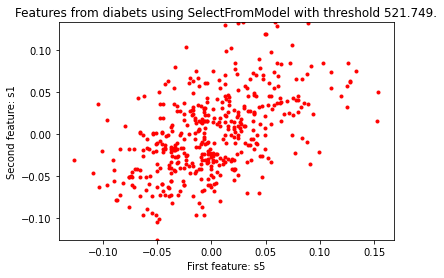

In [43]:
# Plot the two most important features

plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()